In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

In [89]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/alexandraburenko/Desktop/DA/sql/data-1719595126122.csv',parse_dates= ['ad_date'], delimiter=",", encoding='utf-8')
print(data)
pd.reset_option('all')

        ad_date campaign_name    utm_campaign  total_spend  total_impressions  \
0    2021-11-27     Wholesale           cheap         5453              11996   
1    2021-12-21        Trendy           тренд         2489               9303   
2    2021-08-12         Brand     recognition          220              13026   
3    2021-05-28        Promos       discounts         2027              17507   
4    2021-08-21     Lookalike  you_might_like        26298              52158   
...         ...           ...             ...          ...                ...   
1972 2022-01-26        Trendy           тренд         2158               9485   
1973 2020-11-15     Discounts       discounts         1380              17675   
1974 2021-06-12     New items             NaN         7400              12014   
1975 2022-01-04     Wholesale           cheap            0                  0   
1976 2020-12-15     Discounts       discounts         5219              10849   

      total_clicks  total_v

/var/folders/l0/c_c55qln16q926836bkzjfn40000gn/T/ipykernel_60181/2106977170.py:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


**Grouping Data by Day and Building Graphs**
A graph showing the daily amount of advertising costs in 2021.


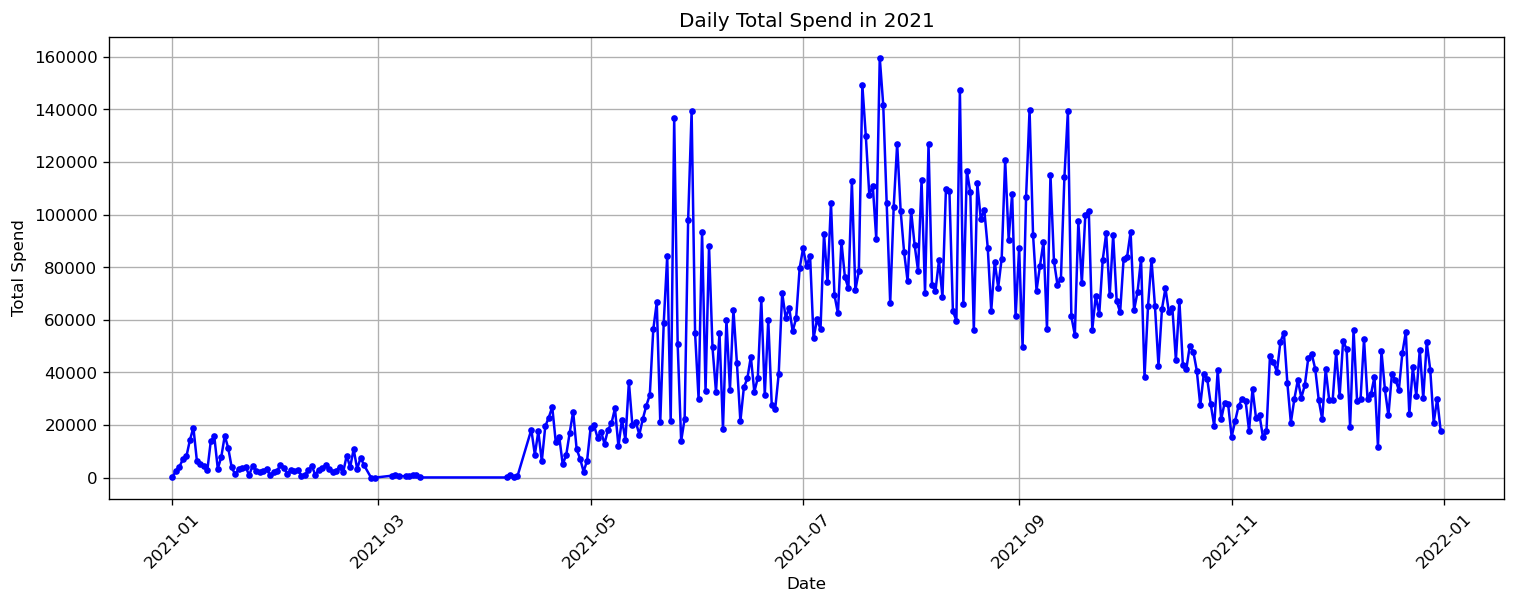

In [63]:
data_2021 = data.loc[data['ad_date'].dt.year == 2021]
grouped_by_day = data_2021.groupby('ad_date', as_index=False).agg({
        'total_spend': 'sum',
        'total_impressions' : 'sum',
        'total_clicks': 'sum',
        'total_value': 'sum' })
    
plt.figure(figsize=(15,5), dpi=120)
plt.plot(grouped_by_day['ad_date'], grouped_by_day['total_spend'],'b-', marker='.', label='Costs')
plt.title('Daily Total Spend in 2021')
plt.xlabel('Date')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

A chart displaying the daily ROMI in 2021.
Rolling method to display the moving average of costs and ROMI.

/var/folders/l0/c_c55qln16q926836bkzjfn40000gn/T/ipykernel_60181/644557961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2021['new_romi'] = group_2021['total_value']/group_2021['total_spend']


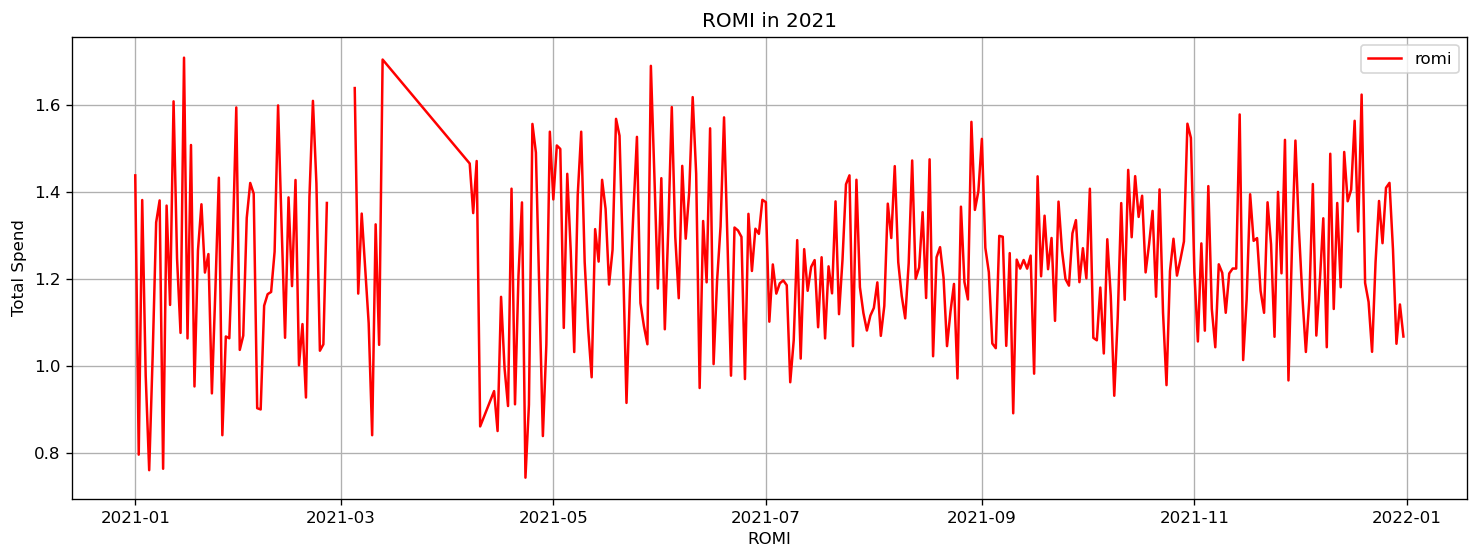

/var/folders/l0/c_c55qln16q926836bkzjfn40000gn/T/ipykernel_60181/644557961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2021['rolling_romi'] = group_2021['new_romi'].rolling(window=7).mean()


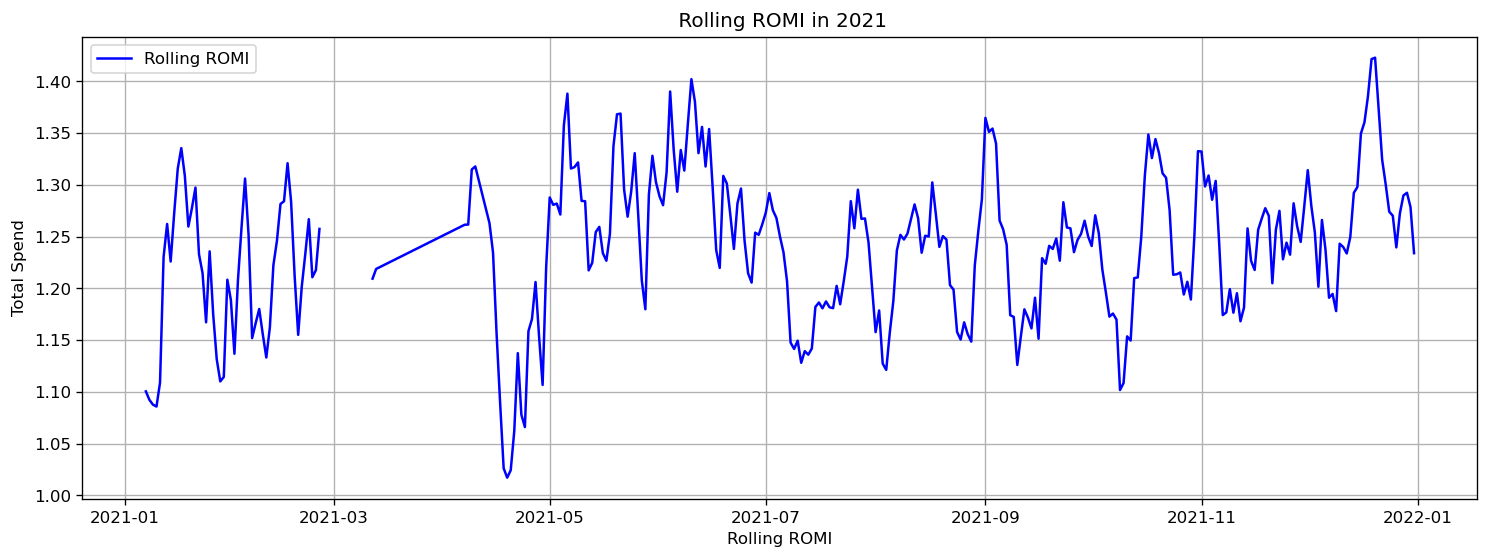

In [112]:
group_2021['new_romi'] = group_2021['total_value']/group_2021['total_spend']
plt.figure(figsize=(15,5), dpi=120)
plt.plot(group_2021['ad_date'], group_2021['new_romi'], 'r-', label='romi')
plt.legend()
plt.title('ROMI in 2021')
plt.xlabel('ROMI')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

group_2021['rolling_romi'] = group_2021['new_romi'].rolling(window=7).mean()
plt.figure(figsize=(15,5), dpi=120)
plt.plot(group_2021['ad_date'], group_2021['rolling_romi'], 'b-',label='Rolling ROMI')
plt.legend()
plt.title(' Rolling ROMI in 2021')
plt.xlabel('Rolling ROMI')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

**Grouping Data by Campaign Name and Building Graphs**
The data by campaign name in two graphs:


A scatter plot displaying the total ROMI for each campaign by Quarters.


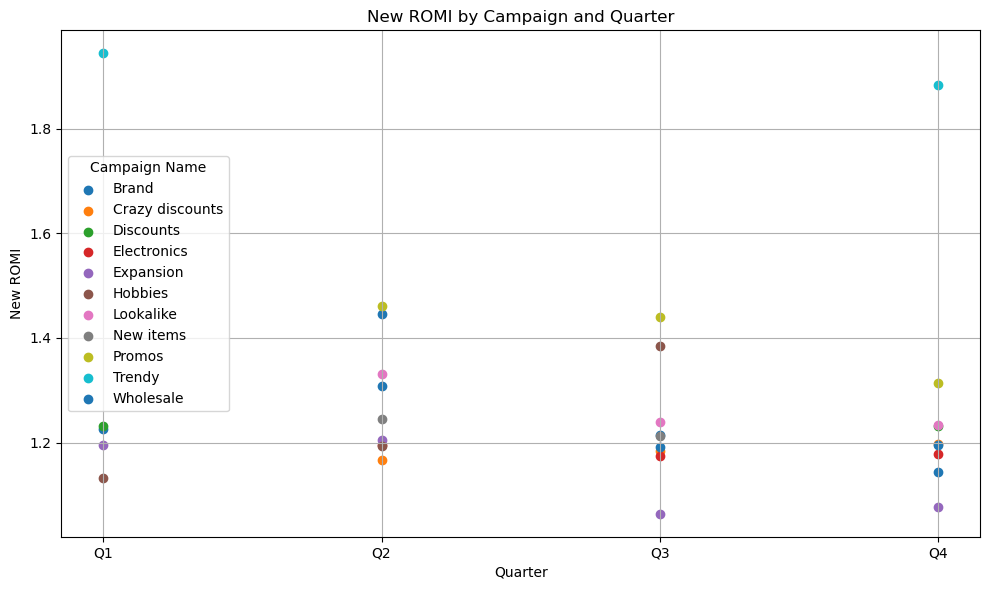

In [91]:

data['ad_date2'] = data['ad_date'].dt.quarter

grouped2 = data.groupby(['campaign_name', 'ad_date2'], as_index=False).agg({
    'total_spend': 'sum',
    'total_impressions': 'sum',
    'total_clicks': 'sum',
    'total_value': 'sum'
})
grouped2['new_romi_by_campaign'] = grouped2['total_value'] / grouped2['total_spend']


campaigns = grouped2['campaign_name'].unique()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for campaign in campaigns:
    campaign_data = grouped2[grouped2['campaign_name'] == campaign]
    ax.scatter(
        campaign_data['ad_date2'],
        campaign_data['new_romi_by_campaign'],
        label=campaign
    )

ax.set_xlabel('Quarter')
ax.set_ylabel('New ROMI')
ax.set_title('New ROMI by Campaign and Quarter')
ax.legend(title='Campaign Name')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])  
plt.grid(True)
plt.tight_layout()
plt.show()


A scatter plot displaying the total ROMI for each campaign by year.

([<matplotlib.axis.XTick at 0x302319d10>,
 [Text(2020, 0, '2020'), Text(2021, 0, '2021'), Text(2022, 0, '2022')])

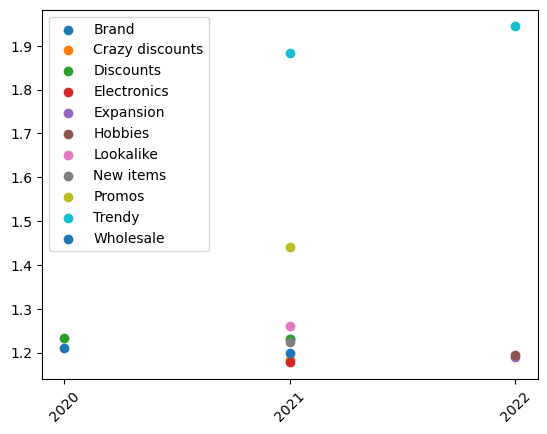

In [93]:
data['ad_date2'] = data['ad_date'].dt.year
grouped2 = data.groupby(['campaign_name','ad_date2'], as_index=False).agg({
        'total_spend': 'sum',
        'total_impressions' : 'sum',
        'total_clicks': 'sum',
        'total_value': 'sum'
        })

grouped2['new_romi_by_campaign'] = grouped2['total_value']/grouped2['total_spend']
campaigns = grouped2.groupby('campaign_name').sum().index
fig, ax = plt.subplots(1,1)
for campaign in campaigns:
    plt.scatter(
        grouped2.loc[grouped2['campaign_name']==campaign]['ad_date2'],
        grouped2.loc[grouped2['campaign_name']==campaign]['new_romi_by_campaign'],
        label=campaign)

plt.legend()
plt.xticks(rotation=45)
plt.xticks(grouped2['ad_date2'].unique())

The total ROMI for each campaign within time

,campaign_name,ad_date,total_spend,total_impressions,total_clicks,total_value,new_romi_by_campaign
0,Brand,2020-12-25,1099,5520,6,1691,1.538672
1,Brand,2020-12-26,3282,31132,24,3992,1.216332
2,Brand,2020-12-27,3476,37577,36,4270,1.228423
3,Brand,2020-12-28,2787,29159,10,3676,1.318981
4,Brand,2020-12-29,1714,13658,8,1450,0.845974
...,...,...,...,...,...,...,...
1552,Wholesale,2022-01-01,0,0,0,0,NaN
1553,Wholesale,2022-01-02,0,0,0,0,NaN
1554,Wholesale,2022-01-03,0,0,0,0,NaN
1555,Wholesale,2022-01-04,0,0,0,0,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Brand'),
  Text(1, 0, 'Crazy discounts'),
  Text(2, 0, 'Discounts'),
  Text(3, 0, 'Electronics'),
  Text(4, 0, 'Expansion'),
  Text(5, 0, 'Hobbies'),
  Text(6, 0, 'Lookalike'),
  Text(7, 0, 'New items'),
  Text(8, 0, 'Promos'),
  Text(9, 0, 'Trendy'),
  Text(10, 0, 'Wholesale')])

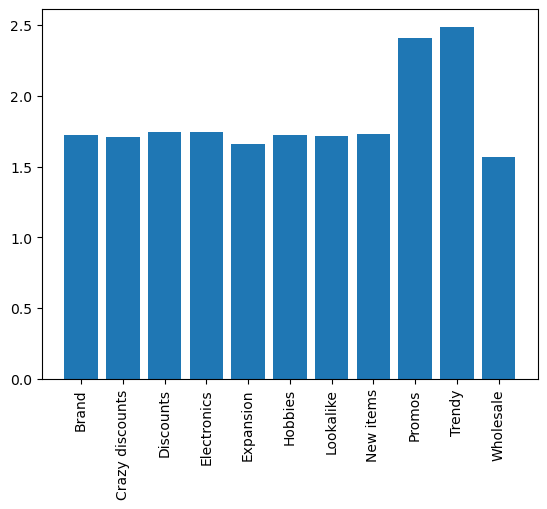

In [95]:
grouped2 = data.groupby(['campaign_name','ad_date'], as_index=False).agg({
        'total_spend': 'sum',
        'total_impressions' : 'sum',
        'total_clicks': 'sum',
        'total_value': 'sum'
        })
grouped2['new_romi_by_campaign'] = grouped2['total_value']/grouped2['total_spend']
display(grouped2)
plt.bar(grouped2['campaign_name'], grouped2['new_romi_by_campaign'])
plt.xticks(rotation=90)

**A bar plot showing the total amount of advertising expenses for each campaign.**


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Brand'),
  Text(1, 0, 'Crazy discounts'),
  Text(2, 0, 'Discounts'),
  Text(3, 0, 'Electronics'),
  Text(4, 0, 'Expansion'),
  Text(5, 0, 'Hobbies'),
  Text(6, 0, 'Lookalike'),
  Text(7, 0, 'New items'),
  Text(8, 0, 'Promos'),
  Text(9, 0, 'Trendy'),
  Text(10, 0, 'Wholesale')])

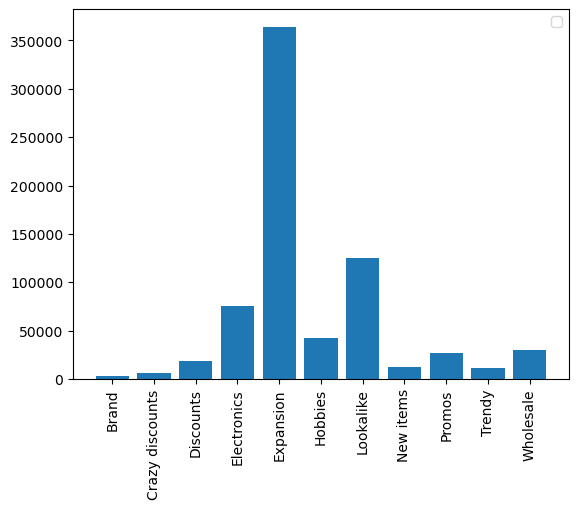

In [97]:
plt.bar(grouped2['campaign_name'], grouped2['total_spend'])
plt.legend()
plt.xticks(rotation=90)

Analyzing ROMI with a Box Plot
I used a box plot to determine the spread of daily ROMI for each campaign, grouping the data by campaign name.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Brand'),
  Text(1, 0, 'Crazy discounts'),
  Text(2, 0, 'Discounts'),
  Text(3, 0, 'Electronics'),
  Text(4, 0, 'Expansion'),
  Text(5, 0, 'Hobbies'),
  Text(6, 0, 'Lookalike'),
  Text(7, 0, 'New items'),
  Text(8, 0, 'Promos'),
  Text(9, 0, 'Trendy'),
  Text(10, 0, 'Wholesale')])

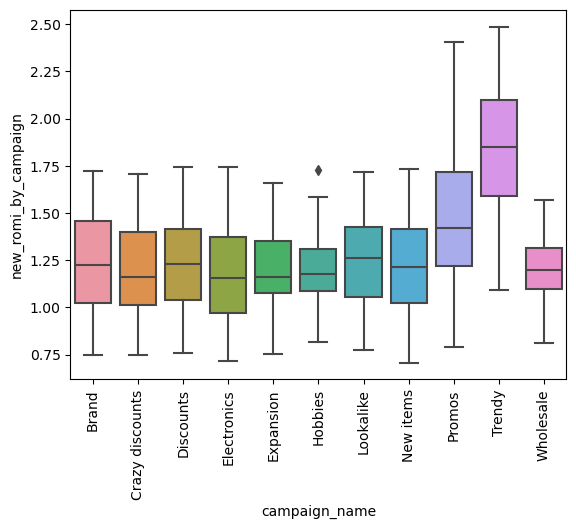

In [99]:
sns.boxplot(x='campaign_name', y="new_romi_by_campaign", data=grouped2)
plt.xticks(rotation=90)

**Building a Histogram for ROMI Distribution**

I built a histogram to show the distribution of ROMI values in the facebook_ads_data.csv table.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='romi', ylabel='Count'>

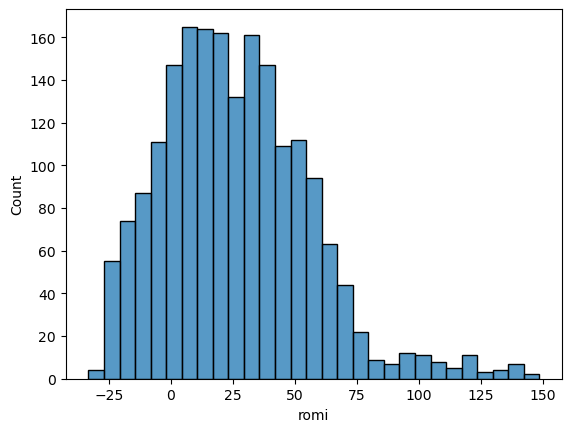

In [101]:
sns.histplot(x='romi', data = data)

**Creating a Heat Map for Correlations**


I constructed a heat map to visualize the correlation between all numerical indicators in the facebook_ads_data.csv table. 

<Axes: >

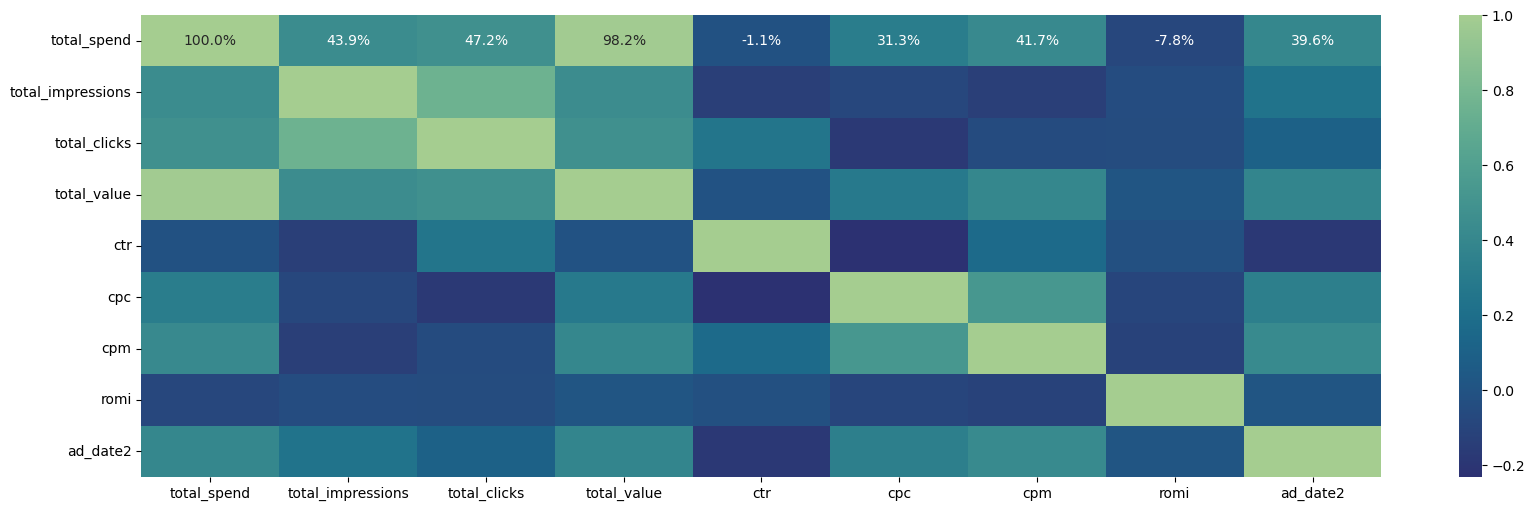

In [103]:
data_corr = data.loc[:,'total_spend':].corr()
data_corr
fig, ax = plt.subplots(1,1, figsize = (20,6))
sns.heatmap(data_corr, annot=True, fmt='1.1%',cmap='crest_r', ax=ax)



Identified which metrics have the highest and lowest correlations and to determine what "total_value" correlates with.



In [105]:
data_corr_1 = data_corr.copy()
for column in data_corr.columns:
    for index in data_corr.index:
        if index == column:
            data_corr_1.loc[index, column] = None

min_value = data_corr_1.abs().min().min()
max_value = data_corr_1.abs().max().max()
#print('min_value','=', min_value, 'max_value','=', max_value )

for column in data_corr_1.columns:
    for index in data_corr_1.index:
        if abs(data_corr_1.loc[index, column]) == min_value :
            print(f"min value  {np.round(data_corr_1.loc[index, column],2)} between: {index}, {column}")
        if abs(data_corr_1.loc[index, column]) == max_value :
            print(f"max_value {np.round(data_corr_1.loc[index, column],2)} between: {index}, {column}")

max_value 0.98 between: total_value, total_spend
max_value 0.98 between: total_spend, total_value
min value  -0.01 between: ctr, total_value
min value  -0.01 between: total_value, ctr


**Building a Dot Plot with Linear Regression**

Constructed a dot plot with a linear regression to visualize the relationship between "total_spend" and "total_value" in the data.

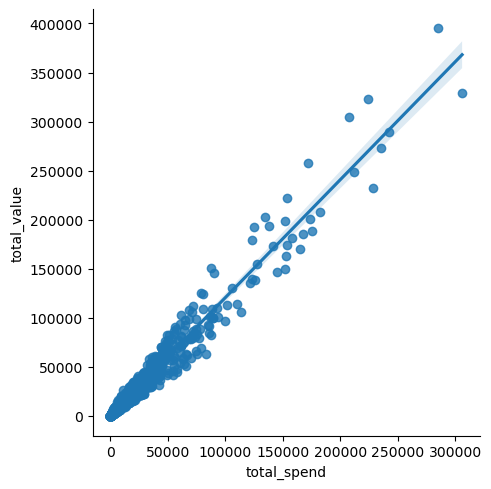

In [107]:
sns.lmplot(data=data, x="total_spend", y="total_value")